# Example: Let's Build and Analyze a Stoichiometric Matrix
Fill me in

## Setup
Fill me in

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Manifest.toml`


## 1: Load a Reaction File and Build a Stoichiometric Matrix
Fill me in

In [2]:
path_to_reaction_file = joinpath(_PATH_TO_DATA,"Urea.net");

Fill me in

In [3]:
reactions = read_reaction_file(path_to_reaction_file, comment="//")

Dict{String, MyChemicalReactionModel} with 22 entries:
  "v4"  => MyChemicalReactionModel("v4", "M_Carbamoyl_phosphate_c+M_L-Ornithine…
  "v5"  => MyChemicalReactionModel("v5", "2*M_L-Arginine_c+4*M_Oxygen_c+3*M_NAD…
  "v1"  => MyChemicalReactionModel("v1", "M_ATP_c+M_L-Citrulline_c+M_L-Aspartat…
  "b12" => MyChemicalReactionModel("b12", "M_Nitric_oxide_c", "[]", true)
  "b2"  => MyChemicalReactionModel("b2", "[]", "M_L-Aspartate_c", true)
  "b14" => MyChemicalReactionModel("b14", "M_H2O_c", "[]", true)
  "b8"  => MyChemicalReactionModel("b8", "M_Orthophosphate_c", "[]", true)
  "b15" => MyChemicalReactionModel("b15", "M_L-Arginine_c", "[]", true)
  "b11" => MyChemicalReactionModel("b11", "[]", "M_H_c", true)
  "v3"  => MyChemicalReactionModel("v3", "M_L-Arginine_c+M_H2O_c", "M_L-Ornithi…
  "b7"  => MyChemicalReactionModel("b7", "M_Diphosphate_c", "[]", true)
  "b9"  => MyChemicalReactionModel("b9", "[]", "M_Oxygen_c", true)
  "b3"  => MyChemicalReactionModel("b3", "M_Fumarate_c", "[]"

Fill me in

In [4]:
S = build(MyStoichiometricMatrixModel, reactions, expand = false);

In [12]:
S.matrix

18×22 Matrix{Float64}:
  0.0   0.0   1.0   0.0  0.0   0.0  …   0.0   0.0   0.0  -1.0   0.0  0.0
  0.0   0.0  -1.0   0.0  0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 -1.0   0.0   0.0   0.0  0.0   0.0      0.0   0.0   0.0   0.0   0.0  1.0
  0.0   0.0   1.0   0.0  0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0  0.0   0.0      0.0   1.0   0.0   0.0   0.0  0.0
  0.0   4.0   0.0   0.0  0.0  -1.0  …   0.0   0.0   0.0   0.0   0.0  0.0
  0.0  -3.0   0.0   0.0  0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0  -2.0   0.0   0.0  0.0   0.0      0.0   1.0   0.0   0.0   0.0  0.0
  0.0   0.0  -1.0   0.0  1.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  1.0   2.0  -1.0   0.0  0.0   0.0     -1.0   0.0   0.0   0.0   0.0  0.0
 -1.0   0.0   0.0   0.0  0.0   0.0  …   0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   1.0   0.0  0.0   0.0      0.0  -1.0   0.0   0.0   0.0  0.0
  0.0  -3.0   0.0   0.0  0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   3.0   0.0   0.0  0.0

### Check: Do the entries of the stoichiometric matrix make sense?

In [21]:
reactions["v5"].reactants

"2*M_L-Arginine_c+4*M_Oxygen_c+3*M_NADPH_c+3*M_H_c"

In [27]:
index_species = findall(x->x < 0.0, S.matrix[:,2])
[S.species[index_species] S.matrix[index_species,2]]

4×2 Matrix{Any}:
 "M_H_c"           -3.0
 "M_L-Arginine_c"  -2.0
 "M_NADPH_c"       -3.0
 "M_Oxygen_c"      -4.0

## 2. Build the Reaction Adjacency Graph (RAG)
Fill me in

In [6]:
B = binary_stoichiometric_matrix(S.matrix)

18×22 Matrix{Int64}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0
 0  1  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [7]:
A = transpose(B)*B

22×22 Matrix{Int64}:
 4  1  1  0  0  0  1  0  0  1  0  0  0  0  1  0  1  0  0  0  0  1
 1  8  1  1  0  1  0  1  1  2  0  1  0  0  0  1  1  1  0  0  1  0
 1  1  6  0  1  0  0  0  0  0  1  0  0  1  0  0  1  1  0  1  0  0
 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0  0
 0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  2  0  0  0  1  0  1  0  4  0  0  0  0  1  0  0  1  1  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  

In [8]:
edge_list = Array{Tuple{Int,Int},1}();
number_of_rows = length(A[:,1]); # we could use size(A,1) as well
for i ∈ 1:number_of_rows
    index_connections = findall(x-> x!==0, A[i,:]);
    for j ∈ index_connections
        if (i ≠ j)
            push!(edge_list, (i,j))
        end
    end
end
E = Edge.(edge_list);

In [9]:
g = SimpleDiGraph(E); # use the Graph.jl package

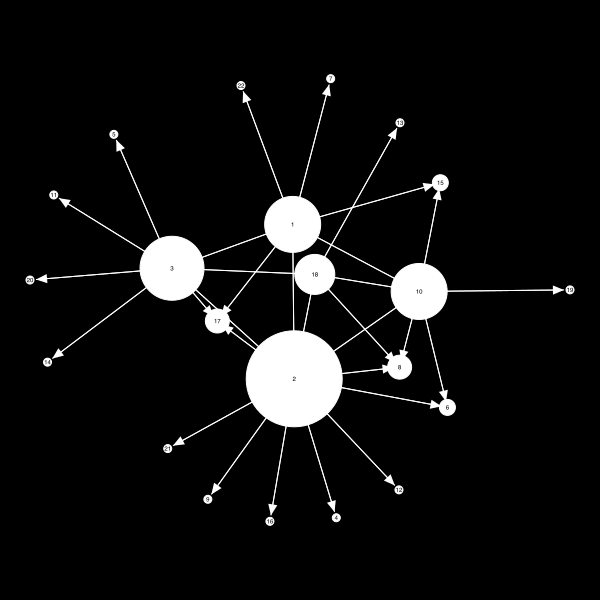

In [37]:
@drawsvg begin
    fontsize(6)
    background("black")
    sethue("white")
    drawgraph(g, layout=stress, vertexlabels = 1:nv(g),
    edgelabels = :none, edgecurvature=0, 
    vertexshapesizes =  2.0*[Graphs.degree(g, v) for v in Graphs.vertices(g)])
end 600 600